feature: 두개의 사진에 대한 임베딩벡터 간 거리, 두개의 사진에 대한 비율간의 거리   
label : 1,2,3,4,5 중 얼마나 닮았는지 

- x: 두 사진의 임베팅 벡터간 거리, 18가지 ratio간 거리
- y: 투표한 레이블 (1,2,3,4,5)

- 추가할 것
1. normalization
2. distance도 cosine 외에 유클리디안 등 써보기


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

In [3]:
import os 
os.chdir('/content/drive/Shareddrives/기업연계 NEW_6/deepface')

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
     |████████████████████████████████| 66.7 MB 25 kB/s 
     |████████████████████████████████| 2.3 MB 51.3 MB/s 
     |████████████████████████████████| 2.0 MB 57.3 MB/s 
     |████████████████████████████████| 3.2 MB 53.4 MB/s 
     |████████████████████████████████| 32.8 MB 1.2 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 462 kB 49.1 MB/s 
  Created wheel for dlib: filename=dlib-19.24.0-cp37-cp37m-linux_x86_64.whl size=4151178 sha256=5740df7fd2a47de30b0b018846841503bec28d6bf6c74ef319cbf977dc146c1e
  Stored in directory: /root/.cache/pip/wheels/33/2f/fb/0a707a1693b1f823c9755fc23143d787fa75ee3561d56e2bc5
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=e44c2cca506409e1e2e7ae90065a4c3be3abb3fd883171025f27bf11c355682d
  Stored in directory

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

^C
sudo: fc-cache-fv: command not found


In [4]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install fire

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from deepface import DeepFace as DFC

In [7]:
from deepface import get_ratio
from deepface import get_ratio_side

# 최종 테스트셋

In [8]:
dataframe = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/3번 여자/dataframe.csv')
dataframe.head(3)

,Unnamed: 0,anchor,compare,anchor_embed,anchor_ratio,compare_embed,compare_ratio,ratio_0,ratio_1,ratio_2,...,ratio_10,ratio_11,ratio_12,ratio_13,ratio_14,ratio_15,ratio_16,ratio_17,anchor_file,compare_file
0,0,b_1_1.jpg,t_10_1.png,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.4914857 -0.41811192 -0.5871361 -1.697646...,[0.1875 0.45283019 0.21293801 0.17520216 0...,0.070873,0.011902,0.001968,...,0.019481,0.059845,0.022073,0.002084,0.131660,0.007043,0.025077,0.087000,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...
1,1,b_1_1.jpg,t_1_1.jpg,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.1382236 -2.4169962 -0.55351406 -1.021950...,[0.23045267 0.43238434 0.21352313 0.15658363 0...,0.027921,0.008544,0.002553,...,0.008197,0.110185,0.031638,0.007754,0.197823,0.021969,0.012097,0.233013,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...
2,2,b_1_1.jpg,t_2_1.jpg,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.5975823 -1.1645559 -0.88408965 -1.242305...,[0.23849372 0.39438944 0.20462046 0.17491749 0...,0.019879,0.046539,0.006350,...,0.007463,0.044366,0.004191,0.007463,0.097816,0.013295,0.005178,0.199430,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...


In [ ]:
front = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/front_label_final.csv')
left = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/left_label_final.csv')
right = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/right_label_final.csv')

front_data = front[['anchor', 'compare','only_trim_round']]
left_data = left[['Anchor','Compare','only_trim_round']]
right_data = right[['Anchor','Compare','only_trim_round']]

In [13]:
import os
os.chdir('/content/drive/Shareddrives/기업연계 NEW_6/deepface')

from deepface.commons import distance

In [ ]:
dataframe

In [12]:
cosine = []
for i in range(30):
  IMG1 = dataframe['anchor_file'].iloc[i]
  IMG2 = dataframe['compare_file'].iloc[i]
  cosine.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'cosine'))


In [13]:
cosine

[0.24676090478897095,
 0.476775586605072,
 0.35352617502212524,
 0.3920501470565796,
 0.26675885915756226,
 0.2650730609893799,
 0.49276334047317505,
 0.2441961169242859,
 0.2680692672729492,
 0.2188597321510315,
 0.24239683151245117,
 0.377439022064209,
 0.2792662978172302,
 0.31055086851119995,
 0.285841166973114,
 0.24864715337753296,
 0.3121950626373291,
 0.15511715412139893,
 0.31921881437301636,
 0.2683714032173157,
 0.2705950140953064,
 0.3697442412376404,
 0.3049112558364868,
 0.3922896385192871,
 0.3829178214073181,
 0.2676684856414795,
 0.3837329149246216,
 0.34222716093063354,
 0.4740750789642334,
 0.2929571270942688]

In [ ]:
cosine = []
for i in range(30):
  IMG1 = dataframe['anchor_file'].iloc[i]
  IMG2 = dataframe['compare_file'].iloc[i]
  cosine.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'cosine'))


In [10]:
eucli = []
for i in range(30):
  IMG1 = dataframe['anchor_file'].iloc[i]
  IMG2 = dataframe['compare_file'].iloc[i]
  eucli.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'euclidean'))

In [11]:
df_eucli = pd.DataFrame(list(zip(eucli)), columns = ['euclidean'])

In [12]:
final_dataframe = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/3번 여자/final_dataframe.csv')

In [15]:
final_dataframe = pd.concat([final_dataframe, df_eucli], axis=1)
final_dataframe

final_dataframe.to_csv('/content/drive/Shareddrives/기업연계 NEW_6/3번 여자/final_dataframe.csv')

In [14]:
df = pd.DataFrame(list(zip(cosine)), columns = ['cosine'])

In [15]:
final_dataframe = pd.concat([dataframe, df], axis=1)
final_dataframe.head(5)

,Unnamed: 0,anchor,compare,anchor_embed,anchor_ratio,compare_embed,compare_ratio,ratio_0,ratio_1,ratio_2,...,ratio_11,ratio_12,ratio_13,ratio_14,ratio_15,ratio_16,ratio_17,anchor_file,compare_file,cosine
0,0,b_1_1.jpg,t_10_1.png,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.4914857 -0.41811192 -0.5871361 -1.697646...,[0.1875 0.45283019 0.21293801 0.17520216 0...,0.070873,0.011902,0.001968,...,0.059845,0.022073,0.002084,0.131660,0.007043,0.025077,0.087000,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...,0.246761
1,1,b_1_1.jpg,t_1_1.jpg,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.1382236 -2.4169962 -0.55351406 -1.021950...,[0.23045267 0.43238434 0.21352313 0.15658363 0...,0.027921,0.008544,0.002553,...,0.110185,0.031638,0.007754,0.197823,0.021969,0.012097,0.233013,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...,0.476776
2,2,b_1_1.jpg,t_2_1.jpg,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.5975823 -1.1645559 -0.88408965 -1.242305...,[0.23849372 0.39438944 0.20462046 0.17491749 0...,0.019879,0.046539,0.006350,...,0.044366,0.004191,0.007463,0.097816,0.013295,0.005178,0.199430,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...,0.353526
3,3,b_1_1.jpg,t_3_1.jpg,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.4636865 -0.2753724 1.1045684 -0.587986...,[0.23214286 0.41420118 0.21005917 0.15680473 0...,0.026230,0.026727,0.000911,...,0.057636,0.047080,0.014225,0.219753,0.002469,0.034259,0.125926,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...,0.392050
4,4,b_1_1.jpg,t_4_1.jpg,[ 1.29320014e+00 -1.38880789e+00 7.93579891e-...,[0.25837321 0.44092827 0.21097046 0.17299578 0...,[ 1.3686273 -0.5653747 1.614205 -2.396335...,[0.22580645 0.44006309 0.21135647 0.1829653 0...,0.032567,0.000865,0.000386,...,0.103023,0.020424,0.012326,0.177830,0.042028,0.000912,0.096139,/content/drive/Shareddrives/기업연계 NEW_6/3...,/content/drive/Shareddrives/기업연계 NEW_6/3...,0.266759


In [16]:
final_dataframe.to_csv('/content/drive/Shareddrives/기업연계 NEW_6/3번 여자/final_dataframe.csv')

## 데이터 준비

- 반올림 O

In [ ]:
front = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/front_label_final.csv')
left = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/left_label_final.csv')
right = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/right_label_final.csv')

front_data = front[['Anchor','Compare','only_trim_round']]
left_data = left[['Anchor','Compare','only_trim_round']]
right_data = right[['Anchor','Compare','only_trim_round']]

In [ ]:
# 임베딩벡터 뽑아내는 코드
def get_embeddingvector(data):
  embeddingvector = DFC.represent(img_path=data, model_name='Facenet', normalization = 'Facenet')

  return embeddingvector

In [ ]:
len(front_data)

2000

In [ ]:
len(left_data)

800

In [ ]:
len(right_data)

800

In [ ]:
pd.set_option('display.max_colwidth', -1)
front_data.head(30)

,Anchor,Compare,only_trim_round
0,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091822/S001/L1/E01/C7.jpg,2
1,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19080832/S001/L2/E01/C7.jpg,3
2,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092632/S001/L2/E01/C7.jpg,3
3,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070921/S001/L1/E01/C7.jpg,4
4,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100432/S001/L2/E01/C7.jpg,2
5,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19071032/S001/L1/E01/C7.jpg,3
6,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091022/S001/L1/E01/C7.jpg,2
7,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100813/S001/L1/E01/C7.jpg,4
8,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19081421/S001/L2/E01/C7.jpg,4
9,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092331/S001/L2/E01/C7.jpg,2


In [ ]:
cosine = [] # 1600개쌍의 사진간 코사인 거리
IMG1_ratio = [] # 1600개쌍의 사진 중 img1의 모든 ratio
IMG2_ratio = [] # 1600개쌍의 사진 중 img2의 모든 ratio
for i in range(1600):
  IMG1 = front_data['Anchor'].iloc[i]
  IMG2 = front_data['Compare'].iloc[i]
  cosine.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'cosine'))
  if i % 5 == 0 :
      IMG1_ratio.append(get_ratio.get_ratio(IMG1))
  else:
      IMG1_ratio.append(IMG1_ratio[i-1])
  IMG2_ratio.append(get_ratio.get_ratio(IMG2))
df = pd.DataFrame(list(zip(cosine, IMG1_ratio, IMG2_ratio)), columns = ['cosine','IMG1_ratio', 'IMG2_ratio2'])
df.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/only_trim_round")

In [ ]:
front = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/front_label_final.csv')

front_data = front[['Anchor','Compare']]

In [ ]:
eucli = [] # 1600개쌍의 사진간 유클리디안 거리
IMG1_ratio = [] # 1600개쌍의 사진 중 img1의 모든 ratio
IMG2_ratio = [] # 1600개쌍의 사진 중 img2의 모든 ratio
for i in range(2000):
  IMG1 = front_data['Anchor'].iloc[i]
  IMG2 = front_data['Compare'].iloc[i]
  eucli.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'euclidean'))
  if i % 5 == 0 :
      IMG1_ratio.append(get_ratio.get_ratio(IMG1))
  else:
      IMG1_ratio.append(IMG1_ratio[i-1])
  IMG2_ratio.append(get_ratio.get_ratio(IMG2))
df_eucli = pd.DataFrame(list(zip(eucli)), columns = ['euclidean'])
df_eucli.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/front_eucli")

In [ ]:
front_eucli = pd.read_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/front_eucli")
front_eucli.drop(["Unnamed: 0"], axis=1, inplace = True)
front_eucli.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/트리계열필요데이터/front_eucli")

In [ ]:
cosine = [] # 1600개쌍의 사진간 코사인 거리
IMG1_ratio = [] # 1600개쌍의 사진 중 img1의 모든 ratio
IMG2_ratio = [] # 1600개쌍의 사진 중 img2의 모든 ratio
for i in range(1600,len(front_data)): # 1600~2000
  IMG1 = front_data['Anchor'].iloc[i]
  IMG2 = front_data['Compare'].iloc[i]
  cosine.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'cosine'))
  if i % 5 == 0 :
      IMG1_ratio.append(get_ratio.get_ratio(IMG1))
  else:
      print(i)
      IMG1_ratio.append(IMG1_ratio[i-1600-1])
  IMG2_ratio.append(get_ratio.get_ratio(IMG2))
dff = pd.DataFrame(list(zip(cosine, IMG1_ratio, IMG2_ratio)), columns = ['cosine','IMG1_ratio', 'IMG2_ratio2'])
dff.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/only_trim_round_test")

In [ ]:
front_eucli

,Unnamed: 0,euclidean
0,0,12.276310
1,1,9.567323
2,2,9.303724
3,3,7.990420
4,4,12.095684
...,...,...
1995,1995,11.384869
1996,1996,11.668796
1997,1997,10.547036
1998,1998,10.891983


In [ ]:
eucli = [] # 1600개쌍의 사진간 유클리디안 거리
IMG1_ratio = [] # 1600개쌍의 사진 중 img1의 모든 ratio
IMG2_ratio = [] # 1600개쌍의 사진 중 img2의 모든 ratio
for i in range(1600,len(front_data)): # 1600~2000
  IMG1 = front_data['Anchor'].iloc[i]
  IMG2 = front_data['Compare'].iloc[i]
  eucli.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'euclidean'))
  if i % 5 == 0 :
      IMG1_ratio.append(get_ratio.get_ratio(IMG1))
  else:
      print(i)
      IMG1_ratio.append(IMG1_ratio[i-1600-1])
  IMG2_ratio.append(get_ratio.get_ratio(IMG2))
dff_eucli = pd.DataFrame(list(zip(euclidean, IMG1_ratio, IMG2_ratio)), columns = ['euclidiean','IMG1_ratio', 'IMG2_ratio2'])
dff_eucli.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/only_trim_round_test_eucli")

- round X = 절사평균값 그대로 쓰기

In [ ]:
front_label = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/front_label_final.csv')
left_label = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/left_label_final.csv')
right_label = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/right_label_final.csv')

front_data_label = front_label[['Anchor','Compare','only_trim_label']]
left_data_label = left_label[['Anchor','Compare','only_trim_label']]
right_data_label = right_label[['Anchor','Compare','only_trim_label']]

In [ ]:
cosine = [] # 1600개쌍의 사진간 코사인 거리
IMG1_ratio = [] # 1600개쌍의 사진 중 img1의 모든 ratio
IMG2_ratio = [] # 1600개쌍의 사진 중 img2의 모든 ratio
for i in range(1600):
  IMG1 = front_data_label['Anchor'].iloc[i]
  IMG2 = front_data_label['Compare'].iloc[i]
  cosine.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'cosine'))
  if i % 5 == 0 :
      IMG1_ratio.append(get_ratio.get_ratio(IMG1))
  else:
      IMG1_ratio.append(IMG1_ratio[i-1])
  IMG2_ratio.append(get_ratio.get_ratio(IMG2))
df_label = pd.DataFrame(list(zip(cosine, IMG1_ratio, IMG2_ratio)), columns = ['cosine','IMG1_ratio', 'IMG2_ratio2'])
df_label.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/only_trim_label")

In [ ]:
cosine = [] # 1600개쌍의 사진간 코사인 거리
IMG1_ratio = [] # 1600개쌍의 사진 중 img1의 모든 ratio
IMG2_ratio = [] # 1600개쌍의 사진 중 img2의 모든 ratio
for i in range(1600,len(front_data)): # 1600~2000
  IMG1 = front_data_label['Anchor'].iloc[i]
  IMG2 = front_data_label['Compare'].iloc[i]
  cosine.append(DFC.find_distance(img1_path=IMG1, img2_path=IMG2, distance_metric = 'cosine'))
  if i % 5 == 0 :
      IMG1_ratio.append(get_ratio.get_ratio(IMG1))
  else:
      print(i)
      IMG1_ratio.append(IMG1_ratio[i-1600-1])
  IMG2_ratio.append(get_ratio.get_ratio(IMG2))
dff_label = pd.DataFrame(list(zip(cosine, IMG1_ratio, IMG2_ratio)), columns = ['cosine','IMG1_ratio', 'IMG2_ratio2'])
dff_label.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/only_trim_label_test")

1601
1602
1603
1604
1606
1607
1608
1609
1611
1612
1613
1614
1616
1617
1618
1619
1621
1622
1623
1624
1626
1627
1628
1629
1631
1632
1633
1634
1636
1637
1638
1639
1641
1642
1643
1644
1646
1647
1648
1649
1651
1652
1653
1654
1656
1657
1658
1659
1661
1662
1663
1664
1666
1667
1668
1669
1671
1672
1673
1674
1676
1677
1678
1679
1681
1682
1683
1684
1686
1687
1688
1689
1691
1692
1693
1694
1696
1697
1698
1699
1701
1702
1703
1704
1706
1707
1708
1709
1711
1712
1713
1714
1716
1717
1718
1719
1721
1722
1723
1724
1726
1727
1728
1729
1731
1732
1733
1734
1736
1737
1738
1739
1741
1742
1743
1744
1746
1747
1748
1749
1751
1752
1753
1754
1756
1757
1758
1759
1761
1762
1763
1764
1766
1767
1768
1769
1771
1772
1773
1774
1776
1777
1778
1779
1781
1782
1783
1784
1786
1787
1788
1789
1791
1792
1793
1794
1796
1797
1798
1799
1801
1802
1803
1804
1806
1807
1808
1809
1811
1812
1813
1814
1816
1817
1818
1819
1821
1822
1823
1824
1826
1827
1828
1829
1831
1832
1833
1834
1836
1837
1838
1839
1841
1842
1843
1844
1846
1847
1848
1849


# Decision Tree

tree_nottunned

In [ ]:
# !pip install pydot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.core.display import Image 

# sklearn 패키지로부터 import tree 
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # export_graphviz: 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듦
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
feature_names = pd.DataFrame(df).columns.to_numpy().tolist()

In [ ]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

In [ ]:
print(feature_names)
print(class_names)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
tree_nottuned = clf.fit()

draw_decision_tree(tree_nottuned, feature_names, )

- F1 score

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
tree_scores = cross_validate(tree_nottuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("F1 Score of not-tuned tree : {:.3f}".format(np.mean(tree_scores['test_f1_macro'])))

# XGBoost

In [ ]:
import xgboost
print(xgboost.__version__)

0.90


In [ ]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# front = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/front_label_final.csv')
# left = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/left_label_final.csv')
# right = pd.read_csv('/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/right_label_final.csv')

# front_data = front[['Anchor','Compare','only_trim_round']]
# left_data = left[['Anchor','Compare','only_trim_round']]
# right_data = right[['Anchor','Compare','only_trim_round']]

In [ ]:
front_data

,Anchor,Compare,only_trim_round
0,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091822/S001/L1/E01/C7.jpg,2
1,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19080832/S001/L2/E01/C7.jpg,3
2,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092632/S001/L2/E01/C7.jpg,3
3,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070921/S001/L1/E01/C7.jpg,4
4,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100432/S001/L2/E01/C7.jpg,2
...,...,...,...
1995,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100133/S001/L2/E01/C7.jpg,2
1996,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19082342/S001/L1/E01/C7.jpg,2
1997,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091631/S001/L2/E01/C7.jpg,4
1998,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19083011/S001/L2/E01/C7.jpg,2


In [ ]:
front_data_ = front_data.iloc[:1600]
front_data_ # 앞 1600개

,Anchor,Compare,only_trim_round
0,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091822/S001/L1/E01/C7.jpg,2
1,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19080832/S001/L2/E01/C7.jpg,3
2,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092632/S001/L2/E01/C7.jpg,3
3,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070921/S001/L1/E01/C7.jpg,4
4,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100432/S001/L2/E01/C7.jpg,2
...,...,...,...
1595,/content/drive/Shareddrives/기업연계6조/data/19090621/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19072212/S001/L2/E01/C7.jpg,3
1596,/content/drive/Shareddrives/기업연계6조/data/19090621/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19101113/S001/L1/E01/C7.jpg,3
1597,/content/drive/Shareddrives/기업연계6조/data/19090621/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100721/S001/L1/E01/C7.jpg,4
1598,/content/drive/Shareddrives/기업연계6조/data/19090621/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091742/S001/L2/E01/C7.jpg,3


In [ ]:
front_data__ = front_data.iloc[1600:]
front_data__ # 뒤 400개

,Anchor,Compare,only_trim_round
1600,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070321/S001/L2/E01/C7.jpg,1
1601,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19082011/S001/L2/E01/C7.jpg,2
1602,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070212/S001/L2/E01/C7.jpg,2
1603,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092641/S001/L2/E01/C7.jpg,2
1604,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19101443/S001/L1/E01/C7.jpg,2
...,...,...,...
1995,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100133/S001/L2/E01/C7.jpg,2
1996,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19082342/S001/L1/E01/C7.jpg,2
1997,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091631/S001/L2/E01/C7.jpg,4
1998,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19083011/S001/L2/E01/C7.jpg,2


In [ ]:
front_data__.reset_index(drop=True, inplace = True) # 뒤 400개
front_data__

,Anchor,Compare,only_trim_round
0,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070321/S001/L2/E01/C7.jpg,1
1,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19082011/S001/L2/E01/C7.jpg,2
2,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070212/S001/L2/E01/C7.jpg,2
3,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092641/S001/L2/E01/C7.jpg,2
4,/content/drive/Shareddrives/기업연계6조/data/19081922/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19101443/S001/L1/E01/C7.jpg,2
...,...,...,...
395,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100133/S001/L2/E01/C7.jpg,2
396,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19082342/S001/L1/E01/C7.jpg,2
397,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091631/S001/L2/E01/C7.jpg,4
398,/content/drive/Shareddrives/기업연계6조/data/19092333/S001/L2/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19083011/S001/L2/E01/C7.jpg,2


df = pd.DataFrame(list(zip(cosine, IMG1_ratio, IMG2_ratio)), columns = ['cosine','IMG1_ratio', 'IMG2_ratio2'])

dff = pd.DataFrame(list(zip(cosine, IMG1_ratio, IMG2_ratio)), columns = ['cosine','IMG1_ratio', 'IMG2_ratio2'])

# 여기부터 합치기

In [ ]:
data_total

,Unnamed: 0,Anchor,Compare,only_trim_round,cosine,IMG1_ratio,IMG2_ratio2
0,0,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190918...,2,0.595443,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26845638 0.44610778 0.20359281 0.16167665 0...
1,1,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190808...,3,0.434672,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.16806723 0.40202703 0.20945946 0.16216216 0...
2,2,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190926...,3,0.364803,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.37692308 0.41139241 0.19620253 0.15189873 0...
3,3,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190709...,4,0.281108,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26056338 0.44099379 0.2173913 0.16149068 0...
4,4,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/191004...,2,0.645831,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.22222222 0.42993631 0.21019108 0.17197452 0...
...,...,...,...,...,...,...,...
1995,1995,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/191001...,2,0.515570,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.44720497 0.20496894 0.17391304 0...
1996,1996,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190823...,2,0.607861,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.304 0.39808917 0.1910828 0.15923567 0...
1997,1997,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190916...,4,0.452198,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25396825 0.42281879 0.22147651 0.14765101 0...
1998,1998,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190830...,2,0.585201,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.43902439 0.21341463 0.15853659 0...


In [ ]:
ratio_df = pd.DataFrame()
ratio_df

""


In [ ]:
data_train = pd.concat([front_data_, df], axis=1)
data_train.head(5)

# Anchor, Compare, only_trim_round, cosine, IMG1_ratio, IMG2_ratio2

,Anchor,Compare,only_trim_round,cosine,IMG1_ratio,IMG2_ratio2
0,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091822/S001/L1/E01/C7.jpg,2,0.595443,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.2684563758389262, 0.44610778443113774, 0.20359281437125748, 0.16167664670658682, 0.08058608058608059, 0.21245421245421245, 0.3389830508474576, 0.25748502994011974, 0.86, 0.21, 0.5116279069767442, 0.47904191616766467, 0.18315018315018314, 1.118421052631579, 0.3125, 0.2625, 0.14652014652014653, 0.625]"
1,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19080832/S001/L2/E01/C7.jpg,3,0.434672,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.16806722689075632, 0.40202702702702703, 0.20945945945945946, 0.16216216216216217, 0.08270676691729323, 0.17293233082706766, 0.30666666666666664, 0.21621621621621623, 0.6956521739130435, 0.17391304347826086, 0.5, 0.40540540540540543, 0.19548872180451127, 1.1388888888888888, 0.43333333333333335, 0.25, 0.17293233082706766, 0.7666666666666667]"
2,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092632/S001/L2/E01/C7.jpg,3,0.364803,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.3769230769230769, 0.41139240506329117, 0.1962025316455696, 0.1518987341772152, 0.06498194945848375, 0.2527075812274368, 0.33935018050541516, 0.2911392405063291, 0.9787234042553191, 0.24468085106382978, 0.5, 0.4620253164556962, 0.1371841155234657, 1.088235294117647, 0.2602739726027397, 0.2602739726027397, 0.18772563176895307, 0.6438356164383562]"
3,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070921/S001/L1/E01/C7.jpg,4,0.281108,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.2605633802816901, 0.4409937888198758, 0.21739130434782608, 0.16149068322981366, 0.09219858156028368, 0.2375886524822695, 0.3205574912891986, 0.20496894409937888, 0.717391304347826, 0.17391304347826086, 0.5151515151515151, 0.422360248447205, 0.1773049645390071, 1.1846153846153846, 0.36764705882352944, 0.25, 0.16312056737588654, 0.6764705882352942]"
4,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100432/S001/L2/E01/C7.jpg,2,0.645831,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.643

In [ ]:
data_test = pd.concat([front_data__ , dff], axis=1)
data_test

# Anchor, Compare, only_trim_round, cosine, IMG1_ratio, IMG2_ratio2

NameError: ignored

In [ ]:
data_train.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/train_front")
data_test.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/test_front")

In [ ]:
data_total = pd.concat([data_train, data_test])
data_total.reset_index(drop=True, inplace = True)
data_total.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/df_front")

In [ ]:
ratio_df = pd.DataFrame()
df_withratio = pd.concat([data_total, ratio_df], axis = 1)
df_withratio.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/withratio_front.csv")

In [ ]:
data_total

,Anchor,Compare,only_trim_round,cosine,IMG1_ratio,IMG2_ratio2
0,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19091822/S001/L1/E01/C7.jpg,2,0.595443,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.2684563758389262, 0.44610778443113774, 0.20359281437125748, 0.16167664670658682, 0.08058608058608059, 0.21245421245421245, 0.3389830508474576, 0.25748502994011974, 0.86, 0.21, 0.5116279069767442, 0.47904191616766467, 0.18315018315018314, 1.118421052631579, 0.3125, 0.2625, 0.14652014652014653, 0.625]"
1,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19080832/S001/L2/E01/C7.jpg,3,0.434672,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.16806722689075632, 0.40202702702702703, 0.20945945945945946, 0.16216216216216217, 0.08270676691729323, 0.17293233082706766, 0.30666666666666664, 0.21621621621621623, 0.6956521739130435, 0.17391304347826086, 0.5, 0.40540540540540543, 0.19548872180451127, 1.1388888888888888, 0.43333333333333335, 0.25, 0.17293233082706766, 0.7666666666666667]"
2,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19092632/S001/L2/E01/C7.jpg,3,0.364803,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.3769230769230769, 0.41139240506329117, 0.1962025316455696, 0.1518987341772152, 0.06498194945848375, 0.2527075812274368, 0.33935018050541516, 0.2911392405063291, 0.9787234042553191, 0.24468085106382978, 0.5, 0.4620253164556962, 0.1371841155234657, 1.088235294117647, 0.2602739726027397, 0.2602739726027397, 0.18772563176895307, 0.6438356164383562]"
3,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19070921/S001/L1/E01/C7.jpg,4,0.281108,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.6438356164383562]","[0.2605633802816901, 0.4409937888198758, 0.21739130434782608, 0.16149068322981366, 0.09219858156028368, 0.2375886524822695, 0.3205574912891986, 0.20496894409937888, 0.717391304347826, 0.17391304347826086, 0.5151515151515151, 0.422360248447205, 0.1773049645390071, 1.1846153846153846, 0.36764705882352944, 0.25, 0.16312056737588654, 0.6764705882352942]"
4,/content/drive/Shareddrives/기업연계6조/data/19073012/S001/L1/E01/C7.jpg,/content/drive/Shareddrives/기업연계6조/data/19100432/S001/L2/E01/C7.jpg,2,0.645831,"[0.2764227642276423, 0.3942307692307692, 0.20512820512820512, 0.16666666666666666, 0.07913669064748201, 0.2589928057553957, 0.3081967213114754, 0.22435897435897437, 0.7446808510638298, 0.19148936170212766, 0.4857142857142857, 0.46794871794871795, 0.1510791366906475, 1.1066666666666667, 0.2876712328767123, 0.2465753424657534, 0.17985611510791366, 0.643

In [ ]:
ratio_df = pd.DataFrame() # DataFrame 생성

In [ ]:
ratio_df.head(5)

""


In [ ]:
def load_data(file_name):
  import pickle
  import os

  save_path = '/content/drive/Shareddrives/기업연계 NEW_6/move_file/model/input_data'
  os.chdir(save_path)

  with open(file_name, 'rb') as fp:
    print(f'now your current directory is {save_path}')
    return pickle.load(fp)

In [ ]:
ratio1_train = load_data('ratio1_train')
ratio2_train = load_data('ratio2_train')

now your current directory is /content/drive/Shareddrives/기업연계 NEW_6/move_file/model/input_data
now your current directory is /content/drive/Shareddrives/기업연계 NEW_6/move_file/model/input_data


In [ ]:
ratio1_train

array([[0.27642276, 0.39423077, 0.20512821, ..., 0.24657534, 0.17985612,
        0.64383562],
       [0.27642276, 0.39423077, 0.20512821, ..., 0.24657534, 0.17985612,
        0.64383562],
       [0.27642276, 0.39423077, 0.20512821, ..., 0.24657534, 0.17985612,
        0.64383562],
       ...,
       [0.33333333, 0.45192308, 0.20512821, ..., 0.28169014, 0.1532567 ,
        0.6056338 ],
       [0.33333333, 0.45192308, 0.20512821, ..., 0.28169014, 0.1532567 ,
        0.6056338 ],
       [0.33333333, 0.45192308, 0.20512821, ..., 0.28169014, 0.1532567 ,
        0.6056338 ]])

In [ ]:
data_total['IMG1_ratio']

0       [0.27642276 0.39423077 0.20512821 0.16666667 0...
1       [0.27642276 0.39423077 0.20512821 0.16666667 0...
2       [0.27642276 0.39423077 0.20512821 0.16666667 0...
3       [0.27642276 0.39423077 0.20512821 0.16666667 0...
4       [0.27642276 0.39423077 0.20512821 0.16666667 0...
                              ...                        
1995    [0.33333333 0.45192308 0.20512821 0.15384615 0...
1996    [0.33333333 0.45192308 0.20512821 0.15384615 0...
1997    [0.33333333 0.45192308 0.20512821 0.15384615 0...
1998    [0.33333333 0.45192308 0.20512821 0.15384615 0...
1999    [0.33333333 0.45192308 0.20512821 0.15384615 0...
Name: IMG1_ratio, Length: 2000, dtype: object

In [ ]:
ratio1_train

array([[0.27642276, 0.39423077, 0.20512821, ..., 0.24657534, 0.17985612,
        0.64383562],
       [0.27642276, 0.39423077, 0.20512821, ..., 0.24657534, 0.17985612,
        0.64383562],
       [0.27642276, 0.39423077, 0.20512821, ..., 0.24657534, 0.17985612,
        0.64383562],
       ...,
       [0.33333333, 0.45192308, 0.20512821, ..., 0.28169014, 0.1532567 ,
        0.6056338 ],
       [0.33333333, 0.45192308, 0.20512821, ..., 0.28169014, 0.1532567 ,
        0.6056338 ],
       [0.33333333, 0.45192308, 0.20512821, ..., 0.28169014, 0.1532567 ,
        0.6056338 ]])

In [ ]:
# # 두 얼굴간 비율의 차이의 절댓값

# for i in range(len(data_total)):
#   a = abs(ratio1_train.iloc[i]-ratio2_train.iloc[i])
#   for j in range(18):
#     ratio_df.loc[i,j] = a[j]

In [ ]:
# 두 얼굴간 비율의 차이의 절댓값

ratio_df = abs(ratio1_train -ratio2_train)
ratio_df.shape

(2000, 18)

In [ ]:
ratio_df

array([[0.00796639, 0.05187702, 0.00153539, ..., 0.01592466, 0.03333597,
        0.01883562],
       [0.10835554, 0.00779626, 0.00433125, ..., 0.00342466, 0.00692378,
        0.12283105],
       [0.10050031, 0.01716164, 0.00892567, ..., 0.01369863, 0.00786952,
        0.        ],
       ...,
       [0.07936508, 0.02910428, 0.0163483 , ..., 0.04639602, 0.01967563,
        0.07083679],
       [0.07638889, 0.01289869, 0.00828643, ..., 0.04557903, 0.01507489,
        0.11658842],
       [0.11111111, 0.05569666, 0.00241896, ..., 0.04639602, 0.02138857,
        0.18848384]])

In [ ]:
ratio_dataframe = pd.DataFrame(ratio_df)
ratio_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.007966,0.051877,0.001535,0.004990,0.001449,0.046539,0.030786,0.033126,0.115319,0.018511,0.025914,0.011093,0.032071,0.011754,0.024829,0.015925,0.033336,0.018836
1,0.108356,0.007796,0.004331,0.004505,0.003570,0.086060,0.001530,0.008143,0.049029,0.017576,0.014286,0.062543,0.044410,0.032222,0.145662,0.003425,0.006924,0.122831
2,0.100500,0.017162,0.008926,0.014768,0.014155,0.006285,0.031153,0.066780,0.234043,0.053191,0.014286,0.005923,0.013895,0.018431,0.027397,0.013699,0.007870,0.000000
3,0.015859,0.046763,0.012263,0.005176,0.013062,0.021404,0.012361,0.019390,0.027290,0.017576,0.029437,0.045588,0.026226,0.077949,0.079976,0.003425,0.016736,0.032635
4,0.054201,0.035706,0.005063,0.005308,0.006135,0.018683,0.003698,0.052384,0.131044,0.043762,0.032804,0.085783,0.073727,0.062165,0.195662,0.013242,0.063577,0.089498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.076389,0.004718,0.000159,0.020067,0.015908,0.024591,0.082139,0.026198,0.280273,0.082999,0.042857,0.038979,0.039480,0.073762,0.053605,0.042884,0.023979,0.260038
1996,0.029333,0.053834,0.014045,0.005390,0.011368,0.004379,0.032634,0.007921,0.128619,0.037257,0.013514,0.022007,0.030399,0.044018,0.028583,0.061102,0.000589,0.114954
1997,0.079365,0.029104,0.016348,0.006195,0.009247,0.023190,0.010112,0.015402,0.144590,0.047017,0.029412,0.001248,0.018639,0.042577,0.013877,0.046396,0.019676,0.070837
1998,0.076389,0.012899,0.008286,0.004690,0.004681,0.019171,0.047127,0.030175,0.210644,0.057469,0.014286,0.016104,0.002480,0.018329,0.008998,0.045579,0.015075,0.116588


In [ ]:
data_total

,Unnamed: 0,Anchor,Compare,only_trim_round,cosine,IMG1_ratio,IMG2_ratio2
0,0,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190918...,2,0.595443,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26845638 0.44610778 0.20359281 0.16167665 0...
1,1,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190808...,3,0.434672,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.16806723 0.40202703 0.20945946 0.16216216 0...
2,2,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190926...,3,0.364803,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.37692308 0.41139241 0.19620253 0.15189873 0...
3,3,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190709...,4,0.281108,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26056338 0.44099379 0.2173913 0.16149068 0...
4,4,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/191004...,2,0.645831,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.22222222 0.42993631 0.21019108 0.17197452 0...
...,...,...,...,...,...,...,...
1995,1995,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/191001...,2,0.515570,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.44720497 0.20496894 0.17391304 0...
1996,1996,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190823...,2,0.607861,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.304 0.39808917 0.1910828 0.15923567 0...
1997,1997,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190916...,4,0.452198,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25396825 0.42281879 0.22147651 0.14765101 0...
1998,1998,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190830...,2,0.585201,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.43902439 0.21341463 0.15853659 0...


In [ ]:
df_withratio = pd.concat([data_total, ratio_dataframe], axis = 1)
df_withratio.to_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/withratio_front.csv")
df_withratio

,Unnamed: 0,Anchor,Compare,only_trim_round,cosine,IMG1_ratio,IMG2_ratio2,0,1,2,...,8,9,10,11,12,13,14,15,16,17
0,0,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190918...,2,0.595443,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26845638 0.44610778 0.20359281 0.16167665 0...,0.007966,0.051877,0.001535,...,0.115319,0.018511,0.025914,0.011093,0.032071,0.011754,0.024829,0.015925,0.033336,0.018836
1,1,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190808...,3,0.434672,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.16806723 0.40202703 0.20945946 0.16216216 0...,0.108356,0.007796,0.004331,...,0.049029,0.017576,0.014286,0.062543,0.044410,0.032222,0.145662,0.003425,0.006924,0.122831
2,2,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190926...,3,0.364803,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.37692308 0.41139241 0.19620253 0.15189873 0...,0.100500,0.017162,0.008926,...,0.234043,0.053191,0.014286,0.005923,0.013895,0.018431,0.027397,0.013699,0.007870,0.000000
3,3,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190709...,4,0.281108,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26056338 0.44099379 0.2173913 0.16149068 0...,0.015859,0.046763,0.012263,...,0.027290,0.017576,0.029437,0.045588,0.026226,0.077949,0.079976,0.003425,0.016736,0.032635
4,4,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/191004...,2,0.645831,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.22222222 0.42993631 0.21019108 0.17197452 0...,0.054201,0.035706,0.005063,...,0.131044,0.043762,0.032804,0.085783,0.073727,0.062165,0.195662,0.013242,0.063577,0.089498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/191001...,2,0.515570,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.44720497 0.20496894 0.17391304 0...,0.076389,0.004718,0.000159,...,0.280273,0.082999,0.042857,0.038979,0.039480,0.073762,0.053605,0.042884,0.023979,0.260038
1996,1996,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190823...,2,0.607861,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.304 0.39808917 0.1910828 0.15923567 0...,0.029333,0.053834,0.014045,...,0.128619,0.037257,0.013514,0.022007,0.030399,0.044018,0.028583,0.061102,0.000589,0.114954
1997,1997,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190916...,4,0.452198,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25396825 0.42281879 0.22147651 0.14765101 0...,0.079365,0.029104,0.016348,...,0.144590,0.047017,0.029412,0.001248,0.018639,0.042577,0.013877,0.046396,0.019676,0.070837
1998,1998,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190830...,2,0.585201,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.43902439 0.21341463 0.15853659 0...,0.076389,0.012899,0.008286,...,0.210644,0.057469,0.014286,0.016104,0.002480,0.018329,0.008998,0.045579,0.015075,0.116588


# 합친 데이터 불러오기

In [ ]:
df_withratio = pd.read_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/withratio_front.csv")
df_withratio = df_withratio.fillna(0)
df_withratio.head(3)

,Unnamed: 0,Unnamed: 0.1,Anchor,Compare,only_trim_round,cosine,IMG1_ratio,IMG2_ratio2,0,1,...,8,9,10,11,12,13,14,15,16,17
0,0,0,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190918...,2,0.595443,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26845638 0.44610778 0.20359281 0.16167665 0...,0.007966,0.051877,...,0.115319,0.018511,0.025914,0.011093,0.032071,0.011754,0.024829,0.015925,0.033336,0.018836
1,1,1,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190808...,3,0.434672,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.16806723 0.40202703 0.20945946 0.16216216 0...,0.108356,0.007796,...,0.049029,0.017576,0.014286,0.062543,0.044410,0.032222,0.145662,0.003425,0.006924,0.122831
2,2,2,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190926...,3,0.364803,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.37692308 0.41139241 0.19620253 0.15189873 0...,0.100500,0.017162,...,0.234043,0.053191,0.014286,0.005923,0.013895,0.018431,0.027397,0.013699,0.007870,0.000000


In [ ]:
X = df_withratio[['cosine',  '0',  '1',
                  '2',  '3','4',  '5',
                   '6', '7',  '8',  '9',
                  '10',  '11', '12', '13',
                 '14',  '15', '16', '17']]

y=  df_withratio[['only_trim_round']]

In [ ]:
y_label = df_withratio['only_trim_round'].to_numpy(dtype=None, copy=False)

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=156, stratify= y_label)
print(X_train.shape , X_test.shape)

(1600, 19) (400, 19)


In [ ]:
feature_names = pd.DataFrame(X).columns

class_name = df_withratio['only_trim_round'].unique().astype(str)

## 1. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest
rf_clf = RandomForestClassifier(min_samples_split = 2, random_state = 42)

# 개별 분류기에 train set 피팅
rf_nottuned = rf_clf.fit(X_train, y_train)

# test셋으로 prediction
rf_pred = rf_clf.predict(X_test)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(rf_pred,y_test)))


# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
rf_scores = cross_validate(rf_clf, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(rf_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.515
parameter가 tuning 되지 않았을 때의 F1 Score : 0.191


Text(0, 0.5, 'attr')

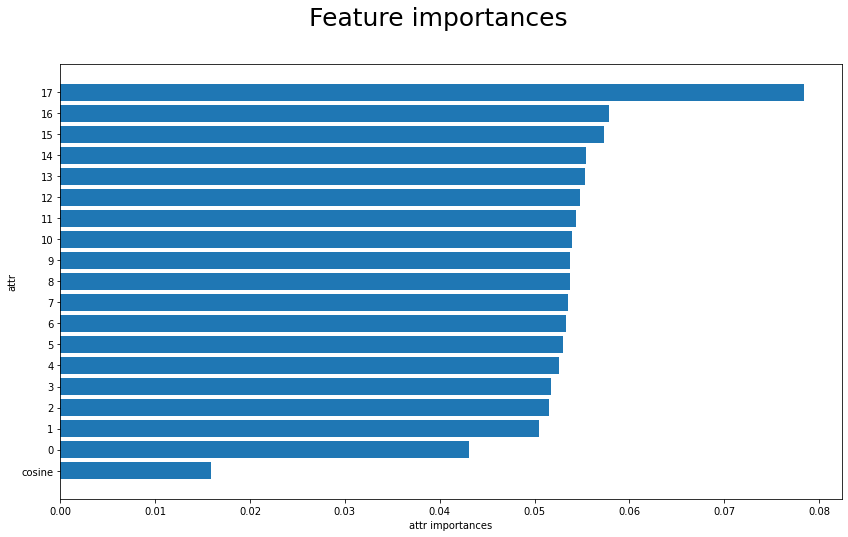

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.suptitle('Feature importances', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(rf_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

In [ ]:
from sklearn.model_selection import GridSearchCV # 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법

# GridSearch는 확인하고 싶은 다양한 파라미터값을 넣어주면
# 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

In [ ]:
np.arange(1, 80,10)

array([ 1, 11, 21, 31, 41, 51, 61, 71])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

dt = RandomForestClassifier()
dt.fit(X_train, y_train)

hyperparamters = {'max_depth': np.arange(1, 80,10),   
                  'min_samples_split': np.arange(1, 80, 10), 
                  'min_samples_leaf': np.arange(1, 100, 10), 
                  'max_leaf_nodes': np.arange(1, 100, 10),
                  'criterion': ['gini', 'entropy']}

# iteration 횟수 설정
n_iter = 1000

# RandomizedSearch 진행
rs = RandomizedSearchCV(dt, 
                        param_distributions=hyperparamters, 
                        n_iter = n_iter,
                        cv=5, verbose=3,
                        return_train_score = True)

rs.fit(X_train, y_train)
rs.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[CV 1/5] END criterion=entropy, max_depth=11, max_leaf_nodes=71, min_samples_leaf=81, min_samples_split=11;, score=(train=0.495, test=0.497) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=11, max_leaf_nodes=71, min_samples_leaf=81, min_samples_split=11;, score=(train=0.495, test=0.497) total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=11, max_leaf_nodes=71, min_samples_leaf=81, min_samples_split=11;, score=(train=0.495, test=0.494) total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=11, max_leaf_nodes=71, min_samples_leaf=81, min_samples_split=11;, score=(train=0.495, test=0.494) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=11, max_leaf_nodes=71, min_samples_leaf=81, min_samples_split=11;, score=(train=0.495, test=0.494) total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=61, max_leaf_nodes=51, min_samples_leaf=1, min_samples_split=61;, score=(train=0.534, test=0.491) total time=   0.8s
[CV 2

{'criterion': 'gini',
 'max_depth': 61,
 'max_leaf_nodes': 71,
 'min_samples_leaf': 1,
 'min_samples_split': 71}

best params = 'criterion': 'gini',
 'max_depth': 61,
 'max_leaf_nodes': 71,
 'min_samples_leaf': 1,
 'min_samples_split': 71

In [ ]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(5, 15)),  'min_samples_split': list(range(50, 100)), 'min_samples_leaf': list(range(10, 100)), 'max_leaf_nodes': list(range(1, 100))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=rf_nottuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 4455000 candidates, totalling 22275000 fits


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

dt = RandomForestClassifier()
dt.fit(X_train, y_train)

hyperparamters = {'max_depth': list(range(1, 50)),  
                  'min_samples_split': list(range(1, 80)), 
                  'min_samples_leaf': list(range(1, 100)), 
                  'max_leaf_nodes': list(range(1, 100)),
                  'criterion': ['gini', 'entropy']}

# iteration 횟수 설정
n_iter = 1000

# RandomizedSearch 진행
rs = RandomizedSearchCV(dt, 
                        param_distributions=hyperparamters, 
                        n_iter = n_iter,
                        cv=5, verbose=3,
                        return_train_score = True)

rs.fit(X_train, y_train)
rs.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END criterion=gini, max_depth=47, max_leaf_nodes=29, min_samples_leaf=23, min_samples_split=37;, score=(train=0.526, test=0.491) total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=47, max_leaf_nodes=29, min_samples_leaf=23, min_samples_split=37;, score=(train=0.524, test=0.497) total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=47, max_leaf_nodes=29, min_samples_leaf=23, min_samples_split=37;, score=(train=0.532, test=0.494) total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=47, max_leaf_nodes=29, min_samples_leaf=23, min_samples_split=37;, score=(train=0.566, test=0.500) total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=47, max_leaf_nodes=29, min_samples_leaf=23, min_samples_split=37;, score=(train=0.552, test=0.491) total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=30, max_leaf_nodes=24, min_samples_leaf=27, min_samples_split=48;, score=(train=0.513, test=0.491) total time= 

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest
rf_clf = RandomForestClassifier(min_samples_split = 2, random_state = 42)

# 개별 분류기에 train set 피팅
rf_nottuned = rf_clf.fit(X_train, y_train)

# test셋으로 prediction
rf_pred = rf_clf.predict(X_test)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(rf_pred,y_test)))


# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
rf_scores = cross_validate(rf_clf, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(rf_scores['test_f1_macro'])))

In [ ]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(5, 15)),  'min_samples_split': list(range(50, 100)), 'min_samples_leaf': list(range(10, 100)), 'max_leaf_nodes': list(range(1, 100))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=rf_nottuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

# GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# gradient boost
gb_clf = GradientBoostingClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
gb_nottuned = gb_clf.fit(X_train,y_train) 

# test셋으로 prediction
gb_pred = gb_clf.predict(X_test)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(gb_pred,y_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
gb_scores = cross_validate(gb_nottuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(gb_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.510
parameter가 tuning 되지 않았을 때의 F1 Score : 0.228


Text(0, 0.5, 'attr')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


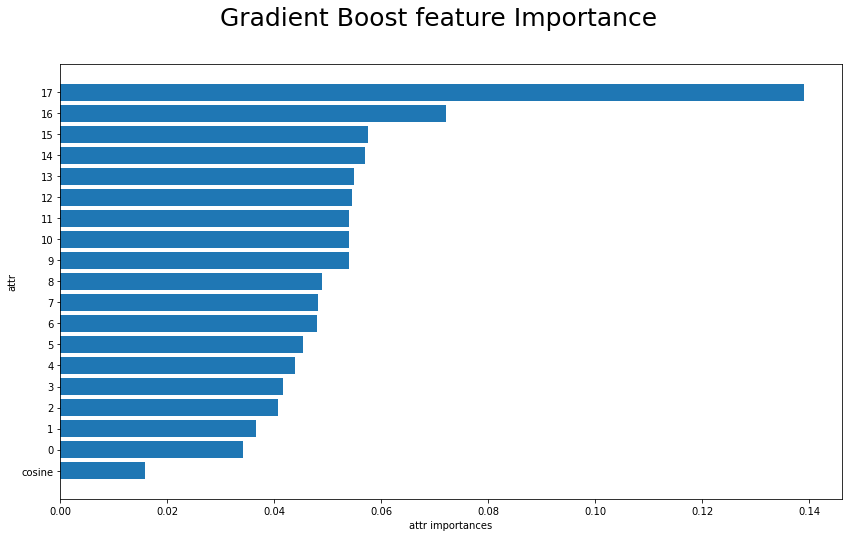

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('Gradient Boost feature Importance', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(gb_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

## 3. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# gradient boost
Ab_clf = AdaBoostClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
Ab_clf.fit(X_train,y_train) 

# test셋으로 prediction
Ab_pred = Ab_clf.predict(X_test)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(Ab_pred,y_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
Ab_scores = cross_validate(Ab_clf, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(Ab_scores['test_f1_macro'])))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.453
parameter가 tuning 되지 않았을 때의 F1 Score : 0.242


Text(0, 0.5, 'attr')

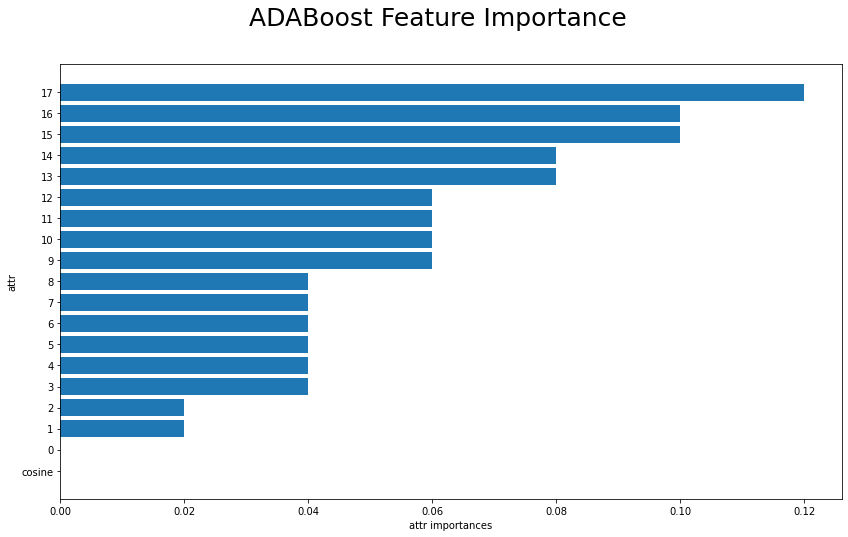

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(14,8))
plt.suptitle('ADABoost Feature Importance', size = 25, ha = 'center')
plt.barh(pd.DataFrame(X_train).columns,np.sort(Ab_clf.feature_importances_), align='center')
plt.xlabel("attr importances")
plt.ylabel("attr")

In [ ]:
X_features = df_withratio[['cosine',  '0',  '1',
                  '2',  '3','4',  '5',
                   '6', '7',  '8',  '9',
                  '10',  '11', '12', '13',
                 '14',  '15', '16', '17'] ].to_numpy(dtype=None, copy=False)

## 4. CatBoostClassifier

In [ ]:
! pip install catboost

     |████████████████████████████████| 76.6 MB 95 kB/s 


In [ ]:
from catboost import CatBoostClassifier

# CAT boost
Cat_clf = CatBoostClassifier(random_state = 42)

# 개별 분류기에 train set 피팅
Cat_clf.fit(X_train,y_train) 

# test셋으로 prediction
Cat_pred = Cat_clf.predict(X_test)

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
Cat_scores = cross_validate(Cat_clf, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(Cat_scores['test_f1_macro'])))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 1.4054193	total: 114ms	remaining: 19s
6:	learn: 1.3816107	total: 136ms	remaining: 19.2s
7:	learn: 1.3614048	total: 152ms	remaining: 18.9s
8:	learn: 1.3427955	total: 169ms	remaining: 18.6s
9:	learn: 1.3265392	total: 185ms	remaining: 18.3s
10:	learn: 1.3090675	total: 202ms	remaining: 18.1s
11:	learn: 1.2930604	total: 219ms	remaining: 18s
12:	learn: 1.2798749	total: 235ms	remaining: 17.8s
13:	learn: 1.2682188	total: 252ms	remaining: 17.7s
14:	learn: 1.2551664	total: 268ms	remaining: 17.6s
15:	learn: 1.2426522	total: 285ms	remaining: 17.5s
16:	learn: 1.2323698	total: 301ms	remaining: 17.4s
17:	learn: 1.2222551	total: 322ms	remaining: 17.6s
18:	learn: 1.2113913	total: 339ms	remaining: 17.5s
19:	learn: 1.1995679	total: 355ms	remaining: 17.4s
20:	learn: 1.1908603	total: 372ms	remaining: 17.3s
21:	learn: 1.1838349	total: 389ms	remaining: 17.3s
22:	learn: 1.1724124	total: 406ms	remaining: 17.2s
23:	learn: 1.1631491	total: 422ms	remaining: 17.2s
24:	

In [ ]:
# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(Cat_pred,y_test)))

parameter가 tuning 되지 않았을 때의 Accuracy: 0.497


## 5. XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier

# 새 섹션

In [ ]:
import xgboost as xgb 

# XGboost
xgb_clf = XGBClassifier(objective='multiclass', random_state=42)

# 개별 분류기에 train set 피팅
xgb.fit(X_train,y_train) 

# test셋으로 prediction
lgbm_pred = xgb_clf.predict(X_test)

# 성능 확인
# accuracy_score 계산
print("parameter가 tuning 되지 않았을 때의 Accuracy: {:.3f}".format(accuracy_score(lgbm_pred,y_test)))

# f-1 score 계산
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['f1_macro']
lgbm_scores = cross_validate(xgb_clf, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(lgbm_scores['test_f1_macro'])))

In [ ]:
len(X_features)

2000

In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156, stratify= y_label)
print(X_train.shape , X_test.shape)

(1600, 19) (400, 19)


In [ ]:
y_train

array([2, 4, 2, ..., 4, 2, 3])

In [ ]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

# 모델학습

In [ ]:
#하이퍼 파라미터 설정
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

## 5. light GBM

In [ ]:
import lightgbm

print(lightgbm.__version__)

2.2.3


In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's multi_logloss: 1.24595	valid_0's multi_logloss: 1.24595
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.23509	valid_0's multi_logloss: 1.23509
[3]	valid_0's multi_logloss: 1.22586	valid_0's multi_logloss: 1.22586
[4]	valid_0's multi_logloss: 1.22072	valid_0's multi_logloss: 1.22072
[5]	valid_0's multi_logloss: 1.21468	valid_0's multi_logloss: 1.21468
[6]	valid_0's multi_logloss: 1.20923	valid_0's multi_logloss: 1.20923
[7]	valid_0's multi_logloss: 1.20345	valid_0's multi_logloss: 1.20345
[8]	valid_0's multi_logloss: 1.19734	valid_0's multi_logloss: 1.19734
[9]	valid_0's multi_logloss: 1.19253	valid_0's multi_logloss: 1.19253
[10]	valid_0's multi_logloss: 1.19202	valid_0's multi_logloss: 1.19202
[11]	valid_0's multi_logloss: 1.18837	valid_0's multi_logloss: 1.18837
[12]	valid_0's multi_logloss: 1.18723	valid_0's multi_logloss: 1.18723
[13]	valid_0's multi_logloss: 1.18439	valid_0's multi_logloss: 1.18439
[14]	valid_0's multi_lo

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = multilabel_confusion_matrix( y_test, pred)
    num_class = confusion.shape[0]
    l = []
    for i in range(num_class):
        
        print("class",i,"의 결과")
        
        TP = confusion[i][0][0] 
        FP =  confusion[i][0][1] 
        FN =  confusion[i][1][0] 
        TN =  confusion[i][1][1] 
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        precision = TP/(TP+FN)
        recall = TP/(TP+FP)
        f1 = 2*(precision*recall)/(precision+recall)
        l.append(TP)
        l.append(TN)
        print('accuracy :', accuracy, 'precision :', precision,'recall :', recall,'f1 :', f1)
    total_accuracy = sum(l)/2000
    print("전체 accuracy :", total_accuracy)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
get_clf_eval(y_test, preds)

class 0 의 결과
accuracy : 0.895 precision : 0.9069767441860465 recall : 0.9831932773109243 f1 : 0.9435483870967741
class 1 의 결과
accuracy : 0.54 precision : 0.6451612903225806 recall : 0.19801980198019803 f1 : 0.303030303030303
class 2 의 결과
accuracy : 0.775 precision : 0.8 recall : 0.9523809523809523 f1 : 0.8695652173913043
class 3 의 결과
accuracy : 0.8275 precision : 0.8457446808510638 recall : 0.9665653495440729 f1 : 0.902127659574468
class 4 의 결과
accuracy : 0.9925 precision : 0.9925 recall : 1.0 f1 : 0.9962358845671266
전체 accuracy : 0.806


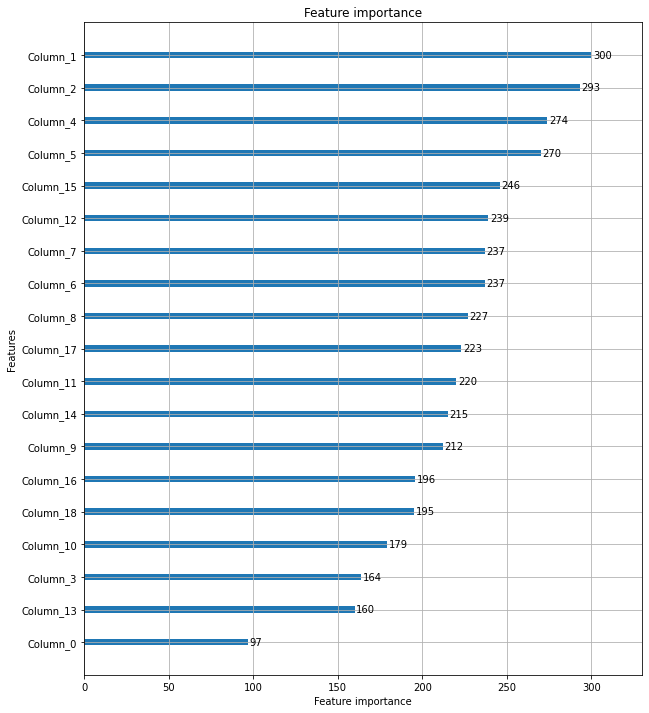

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)

In [ ]:
 # 위 columns 순서 
 #'cosine','0',  '1','2',  '3','4',  '5','6', '7',  '8',  '9','10',  '11', '12', '13','14',  '15', '16', '17'

# 회귀 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

- 파일 불러오기

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=156, stratify= y_label)
print(X_train.shape , X_test.shape)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

- lightGBM 데이터셋으로 전환

In [ ]:
train_ds = lgb.Dataset(X_train, label = y_train)
test_ds = lgb.Dataset(X_test, label = y_test)

- 파라미터 설정

In [ ]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

- 모델 Training

In [ ]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 0.71505
[200]	valid_0's l2: 0.693017
Early stopping, best iteration is:
[195]	valid_0's l2: 0.692615


In [ ]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

- Error

In [ ]:
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

In [ ]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  0.6926148573861372
R2 score:  0.19900559315233024


In [ ]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result

,only_trim_round,0
0,3,2.948824
1,4,2.660160
2,2,2.303847
3,4,2.903158
4,2,2.262383
...,...,...
395,2,2.650795
396,2,2.431015
397,2,2.943957
398,1,1.831927


In [ ]:
final_result.columns = ['label','predict']

- Fitting 결과

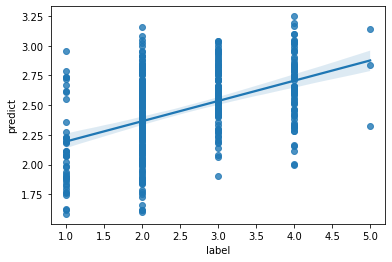

In [ ]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [ ]:
df_label

In [ ]:
dff_label

# RandomForestRegressor: 랜덤포래스트 회귀 예측

In [ ]:
test_front_onlylabel = pd.read_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/test_without비율차_trim")
test_front_onlylabel

,Unnamed: 0,Anchor,Compare,only_trim_label,Unnamed: 0.1,cosine,IMG1_ratio,IMG2_ratio2
0,0,/content/drive/Shareddrives/기업연계6조/data/190819...,/content/drive/Shareddrives/기업연계6조/data/190703...,1.00,0,0.530702,[0.2748538 0.45238095 0.20634921 0.15343915 0...,[0.27007299 0.4335443 0.20886076 0.17088608 0...
1,1,/content/drive/Shareddrives/기업연계6조/data/190819...,/content/drive/Shareddrives/기업연계6조/data/190820...,1.75,1,0.396611,[0.2748538 0.45238095 0.20634921 0.15343915 0...,[0.34482759 0.453125 0.2125 0.15625 0...
2,2,/content/drive/Shareddrives/기업연계6조/data/190819...,/content/drive/Shareddrives/기업연계6조/data/190702...,1.50,2,0.723761,[0.2748538 0.45238095 0.20634921 0.15343915 0...,[0.22222222 0.38650307 0.21472393 0.15337423 0...
3,3,/content/drive/Shareddrives/기업연계6조/data/190819...,/content/drive/Shareddrives/기업연계6조/data/190926...,1.50,3,0.478684,[0.2748538 0.45238095 0.20634921 0.15343915 0...,[0.32876712 0.42690058 0.19298246 0.16959064 0...
4,4,/content/drive/Shareddrives/기업연계6조/data/190819...,/content/drive/Shareddrives/기업연계6조/data/191014...,2.00,4,0.415651,[0.2748538 0.45238095 0.20634921 0.15343915 0...,[0.2972973 0.45398773 0.21472393 0.17177914 0...
...,...,...,...,...,...,...,...,...
395,395,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/191001...,2.50,395,0.515570,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.44720497 0.20496894 0.17391304 0...
396,396,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190823...,1.50,396,0.607861,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.304 0.39808917 0.1910828 0.15923567 0...
397,397,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190916...,3.75,397,0.452198,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25396825 0.42281879 0.22147651 0.14765101 0...
398,398,/content/drive/Shareddrives/기업연계6조/data/190923...,/content/drive/Shareddrives/기업연계6조/data/190830...,2.25,398,0.585201,[0.33333333 0.45192308 0.20512821 0.15384615 0...,[0.25694444 0.43902439 0.21341463 0.15853659 0...


In [ ]:
train_front_onlylabel = pd.read_csv("/content/drive/Shareddrives/기업연계 NEW_6/다연/train_front_onlylabel")
train_front_onlylabel

,Unnamed: 0,Anchor,Compare,only_trim_label,Unnamed: 0.1,cosine,IMG1_ratio,IMG2_ratio2
0,0,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190918...,2.50,0,0.595443,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26845638 0.44610778 0.20359281 0.16167665 0...
1,1,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190808...,2.75,1,0.434672,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.16806723 0.40202703 0.20945946 0.16216216 0...
2,2,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190926...,2.75,2,0.364803,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.37692308 0.41139241 0.19620253 0.15189873 0...
3,3,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/190709...,4.50,3,0.281108,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.26056338 0.44099379 0.2173913 0.16149068 0...
4,4,/content/drive/Shareddrives/기업연계6조/data/190730...,/content/drive/Shareddrives/기업연계6조/data/191004...,2.00,4,0.645831,[0.27642276 0.39423077 0.20512821 0.16666667 0...,[0.22222222 0.42993631 0.21019108 0.17197452 0...
...,...,...,...,...,...,...,...,...
1595,1595,/content/drive/Shareddrives/기업연계6조/data/190906...,/content/drive/Shareddrives/기업연계6조/data/190722...,2.75,1595,0.555002,[0.28205128 0.44318182 0.19318182 0.17613636 0...,[0.26845638 0.45151515 0.20606061 0.18181818 0...
1596,1596,/content/drive/Shareddrives/기업연계6조/data/190906...,/content/drive/Shareddrives/기업연계6조/data/191011...,2.75,1596,0.327405,[0.28205128 0.44318182 0.19318182 0.17613636 0...,[0.23489933 0.43567251 0.21052632 0.15204678 0...
1597,1597,/content/drive/Shareddrives/기업연계6조/data/190906...,/content/drive/Shareddrives/기업연계6조/data/191007...,4.25,1597,0.255797,[0.28205128 0.44318182 0.19318182 0.17613636 0...,[0.3373494 0.46368715 0.2122905 0.16201117 0...
1598,1598,/content/drive/Shareddrives/기업연계6조/data/190906...,/content/drive/Shareddrives/기업연계6조/data/190917...,3.25,1598,0.468391,[0.28205128 0.44318182 0.19318182 0.17613636 0...,[0.33088235 0.41975309 0.21604938 0.14814815 0...
